# **Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα**


---



    

---



## Στόχος της εργασίας είναι η μελέτη και βελτιστοποίηση ταξινομητών σε σύνολα δεδομένων.


## Πριν αρχίσουμε την οποιαδήποτε εκτέλεση θα εισάγουμε τα δεδομένα από το Kaggle.

In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [ ]:
import json

token = {"username":"hidden","key":"hidden"} 
with open('/content/.kaggle/kaggle.json', 'w') as file: 
  json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

## Eισαγωγή του dataset Dry Bean

In [ ]:
!kaggle datasets download -d sansuthi/dry-bean-dataset -p /content

dry-bean-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip

Archive:  dry-bean-dataset.zip
replace Dry_Bean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Dry_Bean.csv            


# Εισαγωγή και επισκόπηση
### Στην ομάδα 38 αντιστοιχεί ο κωδικός *K07* του Kaggle dataset. Το dataset με το οποίο θα δουλέψουμε είναι το Dry Bean Dataset. Το dataset περιλαμβάνει εικόνες 13.611 κόκκων από 7 διαφορετικά καταχωρημένα ξερά φασόλια. Δηλαδή έχουμε 13.611 δείγματα. 

### Κάθε δείγμα συνολικά έχει 16 χαρακτηριστικά. Τα πρώτα 12 αποτελούν τα χαρακτηριστικά των φασολιών και τα τελευταία 4 αποτελούν το σχήμα των φασολιών.

### Τα 16 γεωμετρικά χαρακτηριστικά δεν περιέχουν πληροφορίες σχετικά με το χρώμα των φασολιών. Από πρακτικής άποψης είναι ατυχές, καθώς τα διαφορετικά είδη ξηρών φασολιών τείνουν να διαφέρουν έντονα ως προς το χρώμα. Ωστόσο θα αντιμετωπίσουμε το παρών πρόβλημα ως άσκηση στην κατασκευή και σύγκριση μοντέλων μηχανικής μάθησης.

### Η 17η κολώνα αποτελεί τις ετικέτες των κλάσεων.

### Οι κλάσεις των δειγμάτων είναι 7 στο σύνολο. Ένα ξηρό φασόλι, λοιπόν, μπορεί να ανήκει σε μία από τις επόμενες 7 κλάσεις.

### (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

### Παρακάτω εμφανίζουμε το dataset.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Dry_Bean.csv")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


## Aπό το dataset δεν απουσιάζει κάποια τιμή. Αυτό το ελέγχουμε βέβαια στο παρακάτω κελί.

## Επικεφαλίδες δεν υπάρχουν ούτε αρίθμηση γραμμών. Επίσης και τα 16 χαρακτηριστικά είναι αριθμητικά δεδομένα.

## Ωστόσο η 17η κολώνα, δηλαδή οι ετικέτες των κλάσεων μας είναι σε μορφή strings, κάτι το οποίο δε μας προβληματίζει καθώς οι εκτιμητές που θα χρησιμοποιήσουμε για ταξινόμηση μετατρέπουν εσωτερικά τις ετικέτες σε ακέραιους αριθμούς


In [ ]:
if not df.isnull().any().any():
  print("Our dataset does not contain NaN values")
else:
  print("Our dataset contains NaN values")
# Shape of our dataset
print(df.shape)
# Shape of our features
features_df = df.iloc[:, :-1]
print(features_df.shape)
# Shape of our classes
labels_df = df.iloc[:, -1]
print(labels_df.shape)
classes_count = np.array(["SEKER","BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SIRA"])

Our dataset does not contain NaN values
(13611, 17)
(13611, 16)
(13611,)


## Tέλος στο παρακάτω κελί βλέπουμε και πόσα δείγματα ανήκουν σε κάθε μία από τις 7 κλάσεις. Παρατηρούμε πως το dataset μας δεν είναι ισορροπημένο.

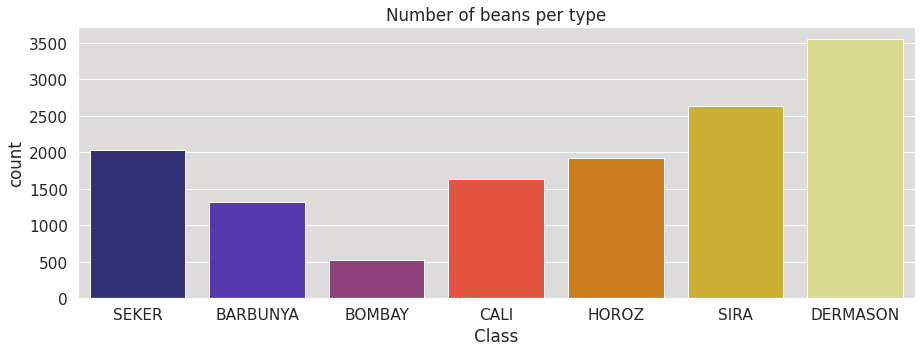

In [ ]:
import seaborn
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
seaborn.countplot(x = df.Class, palette="CMRmap")
plt.title("Number of beans per type")
plt.show()

## Παρακάτω θα διαχωρίσουμε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο (test set) με 30% των δειγμάτων στο test set. Παρατηρούμε πως τα δεδομένα εκπαίδευσης δεν έχουν ισορροπημένα πλήθη ανά κατηγορία.

In [ ]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(features_df, labels_df, test_size=0.30)

print(f"The number of beans in the training set: {len(train)}")
print(f"The number of beans in the testing set: {len(test)}")
print(f"The beans are distubuted among classes as follows:\n{train_labels.value_counts()}")

The number of beans in the training set: 9527
The number of beans in the testing set: 4084
The beans are distubuted among classes as follows:
DERMASON    2475
SIRA        1855
SEKER       1418
HOROZ       1359
CALI        1124
BARBUNYA     920
BOMBAY       376
Name: Class, dtype: int64


## Οπτική απεικονίση του μη ισορροπημένου train dataset, το οποίο κυμαίνεται σε παρόμοια επίπεδα με το αρχικό μη ισορροπημένο dataset.

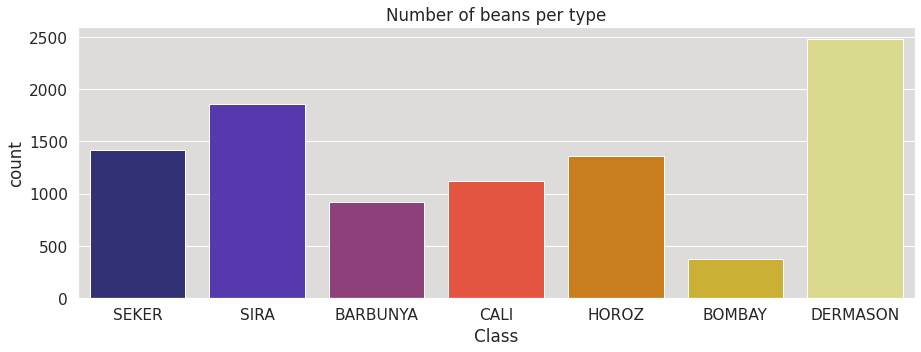

In [ ]:
plt.figure(figsize = (15, 5))
seaborn.countplot(x = train_labels, palette="CMRmap")
plt.title("Number of beans per type")
plt.show()

## Ο στόχος όλων τoυ dataset είναι να επιτευχθεί μια "γενίκευμενη"ικανότητα κατηγοριοποίησης ενός νεόυ φασολιού. Επομένως, είναι σημαντικό να ελέγξουμε την ακρίβεια της ταξινόμησης νέων δειγμάτων, εκείνων που δεν έχουν χρησιμοποιηθεί κατά τη διάρκεια της εκπαίδευσης. Διαφορετικά, υπάρχει πολύ σοβαρός κίνδυνος το μοντέλο να υποστεί overfit. Oπότε η μετρική που θα διαλέξουμε είναι το accuracy, δηλαδή στο παρών dataset θα θέλαμε να γνωρίζουμε ένα νέο φασόλι σε ποια κατηγορία ανήκει.

## Οι ταξινομητές μας θα είναι οι Mylti-Layer Perceptron (MLP) και Support Vector Machines (SVM).

# Επίδοση out-of-the-box

## Καθαρά για λόγους σύγκρισης σε αυτό το στάδιο θα συγκρίνουμε τους ταξινομητές με το DummyClassifier


### Ταξινόμηση με DummyClassifier



In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import time

accuracy_results = {}
accuracy_results_compare = {}

accuracy_results_compare_SVM = {}
accuracy_results_compare_MLP = {}

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_SEKER = DummyClassifier(strategy="constant", constant="SEKER")
dc_constant_BARBUNYA = DummyClassifier(strategy="constant", constant="BARBUNYA")
dc_constant_BOMBAY = DummyClassifier(strategy="constant", constant="BOMBAY")
dc_constant_CALI = DummyClassifier(strategy="constant", constant="CALI")
dc_constant_DERMASON = DummyClassifier(strategy="constant", constant="DERMASON")
dc_constant_HOROZ = DummyClassifier(strategy="constant", constant="HOROZ")
dc_constant_SIRA = DummyClassifier(strategy="constant", constant="SIRA")

dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

dc_uniform.fit(train, train_labels)
preds_dc_uniform = dc_uniform.predict(test)
accuracy_results['Dummy Uniform'] = accuracy_score(test_labels, preds_dc_uniform)


dc_constant_SEKER.fit(train, train_labels)
preds_dc_constant_SEKER = dc_constant_SEKER.predict(test)
accuracy_results['Dummy Constant(SEKER)'] = accuracy_score(test_labels, preds_dc_constant_SEKER)

dc_constant_BARBUNYA.fit(train, train_labels)
preds_dc_constant_BARBUNYA = dc_constant_BARBUNYA.predict(test)
accuracy_results['Dummy Constant(BARBUNYA)'] = accuracy_score(test_labels, preds_dc_constant_BARBUNYA)

dc_constant_BOMBAY.fit(train, train_labels)
preds_dc_constant_BOMBAY = dc_constant_BOMBAY.predict(test)
accuracy_results['Dummy Constant(BOMBAY)'] = accuracy_score(test_labels, preds_dc_constant_BOMBAY)

dc_constant_CALI.fit(train, train_labels)
preds_dc_constant_CALI = dc_constant_CALI.predict(test)
accuracy_results['Dummy Constant(CALI)'] = accuracy_score(test_labels, preds_dc_constant_CALI)

dc_constant_DERMASON.fit(train, train_labels)
preds_dc_constant_DERMASON = dc_constant_DERMASON.predict(test)
accuracy_results['Dummy Constant(DERMASON)'] = accuracy_score(test_labels, preds_dc_constant_DERMASON)

dc_constant_HOROZ.fit(train, train_labels)
preds_dc_constant_HOROZ = dc_constant_HOROZ.predict(test)
accuracy_results['Dummy Constant(HOROZ)'] = accuracy_score(test_labels, preds_dc_constant_HOROZ)

dc_constant_SIRA.fit(train, train_labels)
preds_dc_constant_SIRA = dc_constant_SIRA.predict(test)
accuracy_results['Dummy Constant(SIRA)'] = accuracy_score(test_labels, preds_dc_constant_SIRA)

dc_most_frequent.fit(train, train_labels)
preds_dc_most_frequent = dc_most_frequent.predict(test)
accuracy_results['Dummy Most Frequent'] = accuracy_score(test_labels, preds_dc_most_frequent)

dc_stratified.fit(train, train_labels)
preds_dc_stratified = dc_stratified.predict(test)
accuracy_results['Dummy Stratified'] = accuracy_score(test_labels, preds_dc_stratified)

## Ταξινόμηση με  Support Vector Machines (SVM)

### Αποθηκεύουμε τις μετρήσεις του SVM στα αντίστοιχα dictionary. Δίνουμε default παραμέτρους στον ταξινομητή.


In [ ]:
#import Support Vector Machines
from sklearn.svm import SVC

clf = SVC()
# calculate fit time
start_time_fit = time.time()
clf.fit(train, train_labels)
fit_time = time.time() - start_time_fit
# calculate predict time
start_time_predict = time.time()
preds_clf = clf.predict(test)
predict_time = time.time() - start_time_predict
accuracy_results['SVM'] = accuracy_score(test_labels, preds_clf)
cnf_matrix_SVM_out_of_the_box = confusion_matrix(test_labels, preds_clf)
print(classification_report(test_labels, preds_clf))
# save for optimization reports later
accuracy_results_compare['SVM(out-of-the-box)'] = ["default dataset", "default parameters", f'{fit_time} sec', f'{predict_time} sec', accuracy_score(test_labels, preds_clf)]
accuracy_results_compare_SVM['SVM(out-of-the-box)'] = ["default dataset", "default parameters", f'{fit_time} sec', f'{predict_time} sec', accuracy_score(test_labels, preds_clf)]

              precision    recall  f1-score   support

    BARBUNYA       0.34      0.05      0.09       402
      BOMBAY       1.00      0.99      0.99       146
        CALI       0.60      0.89      0.72       506
    DERMASON       0.79      0.86      0.83      1071
       HOROZ       0.60      0.60      0.60       569
       SEKER       0.43      0.27      0.33       609
        SIRA       0.56      0.74      0.64       781

    accuracy                           0.64      4084
   macro avg       0.62      0.63      0.60      4084
weighted avg       0.61      0.64      0.60      4084



## Παρακάτω έχουμε το confusion matrix του SVM(οut-of-the-box)

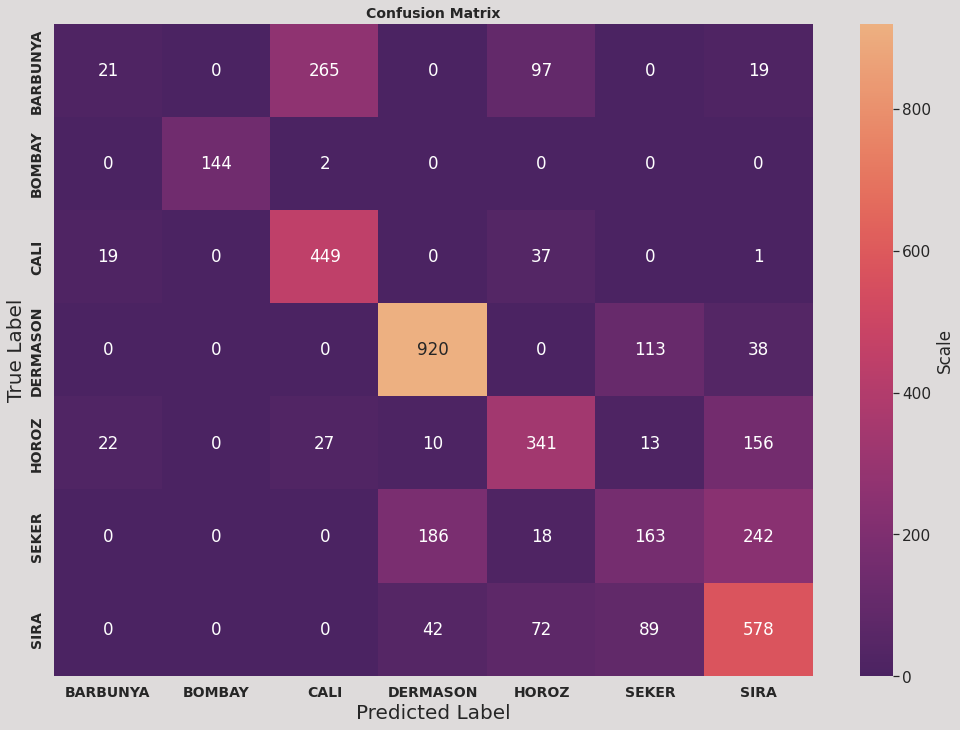

In [ ]:
def plot_confusion_matrix(data, labels):    
    seaborn.set(color_codes=True)
    plt.figure(figsize = (17, 12), facecolor='#dedbdb')
    plt.title("Confusion Matrix", fontweight='bold',fontsize="14")
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="flare_r", cbar_kws={'label': 'Scale'}, fmt='g')
    ax.set_xticklabels(labels, fontweight='bold', fontsize="14")
    ax.set_yticklabels(labels, fontweight='bold', fontsize="14")
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    ax.xaxis.get_label().set_fontsize(20)
    ax.yaxis.get_label().set_fontsize(20)
 
labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
plot_confusion_matrix(cnf_matrix_SVM_out_of_the_box, labels)


## Ταξινόμηση με  Mylti-Layer Perceptron (MLP)

### Αποθηκεύουμε τις μετρήσεις του MLP στα αντίστοιχα dictionary. Δίνουμε default παραμέτρους στον ταξινομητή.

In [ ]:
#import Mylti-Layer Perceptron
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

# calculate fit time
start_time_fit = time.time()
clf.fit(train, train_labels)
fit_time = time.time() - start_time_fit
# calculate predict time
start_time_predict = time.time()
preds_clf = clf.predict(test)
predict_time = time.time() - start_time_predict
accuracy_results['MLP'] = accuracy_score(test_labels, preds_clf)
cnf_matrix_MLP_out_of_the_box = confusion_matrix(test_labels, preds_clf)
print(classification_report(test_labels, preds_clf))
# save for optimization reports later
accuracy_results_compare['MLP(out-of-the-box)'] = ["default dataset", "default parameters", f'{fit_time} sec', f'{predict_time} sec', accuracy_score(test_labels, preds_clf)]
accuracy_results_compare_MLP['MLP(out-of-the-box)'] = ["default dataset", "default parameters", f'{fit_time} sec', f'{predict_time} sec', accuracy_score(test_labels, preds_clf)]

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       402
      BOMBAY       0.24      1.00      0.39       146
        CALI       0.00      0.00      0.00       506
    DERMASON       0.48      1.00      0.65      1071
       HOROZ       1.00      0.00      0.01       569
       SEKER       0.00      0.00      0.00       609
        SIRA       0.22      0.34      0.26       781

    accuracy                           0.36      4084
   macro avg       0.28      0.33      0.19      4084
weighted avg       0.31      0.36      0.23      4084



## Παρακάτω έχουμε το confusion matrix του MLP(οut-of-the-box)

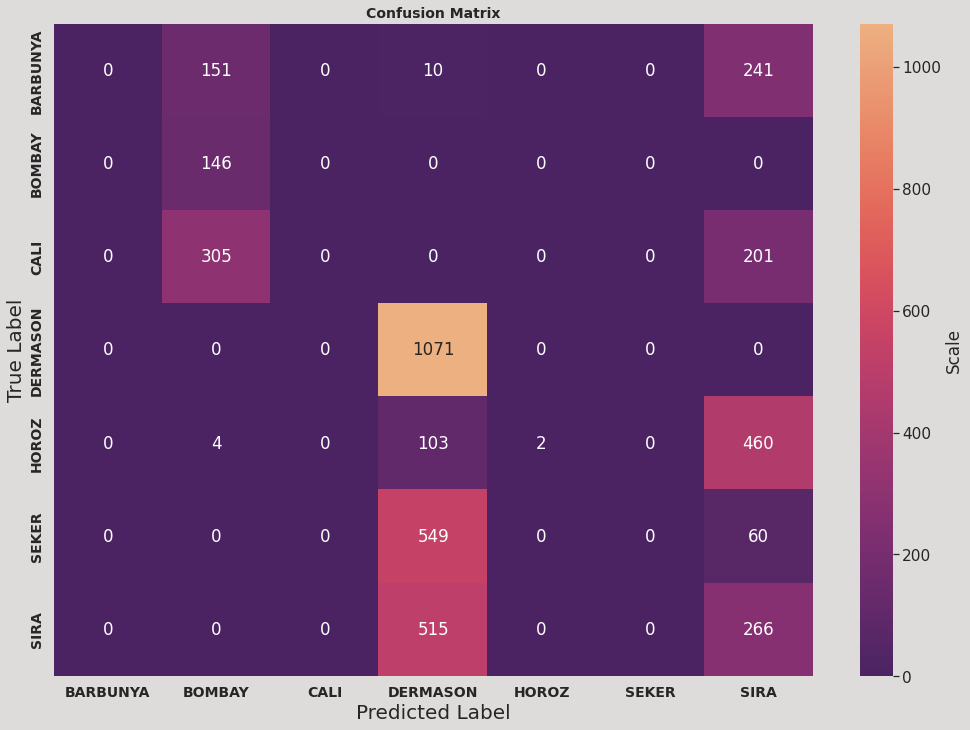

In [ ]:
def plot_confusion_matrix(data, labels):    
    seaborn.set(color_codes=True)
    plt.figure(figsize = (17, 12), facecolor='#dedbdb')
    plt.title("Confusion Matrix", fontweight='bold',fontsize="14")
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="flare_r", cbar_kws={'label': 'Scale'}, fmt='g')
    ax.set_xticklabels(labels, fontweight='bold', fontsize="14")
    ax.set_yticklabels(labels, fontweight='bold', fontsize="14")
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    ax.xaxis.get_label().set_fontsize(20)
    ax.yaxis.get_label().set_fontsize(20)
 
labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
plot_confusion_matrix(cnf_matrix_MLP_out_of_the_box, labels)

### Tαξινομούμε τα dictionaries και τα μετατρέπουμε σε λίστα. Ύστερα δημιουργούμε data_frames ώστε να έχουμε καλύτερη απεικόνιση των αποτελεσμάτων και αποφεύγουμε τη δημιουργία πίνακα σε markdown.

In [ ]:
dataFrame_accuracy_scores = []

# Create a list of lists for accuracy score
sorted_accuracy_results = [(k, accuracy_results[k]) for k in sorted(accuracy_results, key=accuracy_results.get, reverse=True)]
for i in range(len(accuracy_results)):
  dataFrame_accuracy_scores.append(list(sorted_accuracy_results[i]))
  dataFrame_accuracy_scores[i].insert(0, i + 1)

# Create dataFrames to show results
df_accuracy_scores = pd.DataFrame(dataFrame_accuracy_scores, columns =['Index','Classifier', 'Αccuracy'])

### Παρακάτω απεικονίζουμε τις αποδόσεις των ταξινομητών ως προς Accuracy.

In [ ]:
df_accuracy_scores.style.hide_index()

Index,Classifier,Αccuracy
1,SVM,0.640548
2,MLP,0.363614
3,Dummy Constant(DERMASON),0.262243
4,Dummy Most Frequent,0.262243
5,Dummy Constant(SIRA),0.191234
6,Dummy Stratified,0.169687
7,Dummy Constant(SEKER),0.149119
8,Dummy Uniform,0.142752
9,Dummy Constant(HOROZ),0.139324
10,Dummy Constant(CALI),0.123898


### Παρακάτω απεικονίζουμε τις αποδόσεις των ταξινομητών ως προς Accuracy σε bar plot σύγκρισης.


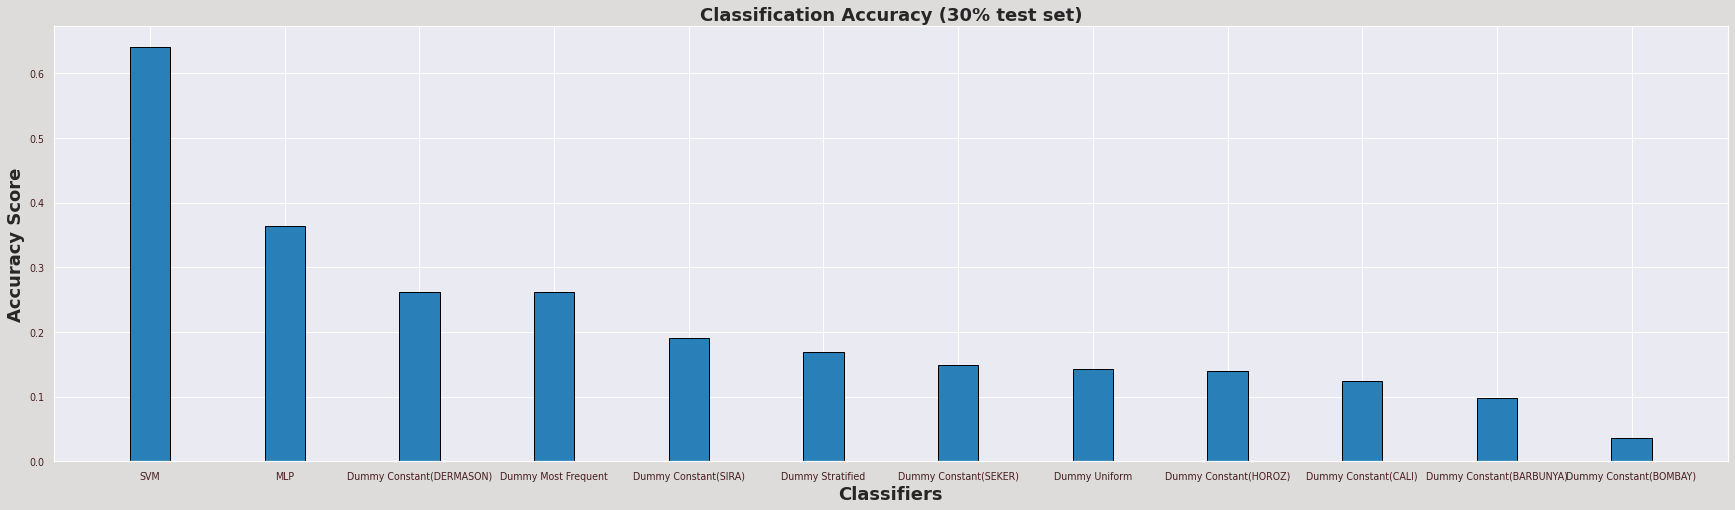

In [ ]:
import matplotlib.pyplot as plt

sorted_accuracy_results_dict = dict(sorted(accuracy_results.items(), key=lambda item: item[1],reverse=True))
classifiers_accuracy = list(sorted_accuracy_results_dict.keys())
values_accuracy = list(sorted_accuracy_results_dict.values())
  
fig = plt.figure(figsize = (30, 8), facecolor='#dedbdb')
 
# creating the bar plot
plt.bar(classifiers_accuracy, values_accuracy, color=	"#2980b9", edgecolor ='black',
        width = 0.30)
 
plt.xlabel("Classifiers", fontweight='bold', fontsize="18", )
plt.ylabel("Accuracy Score", fontweight='bold', fontsize="18")
plt.title("Classification Accuracy (30% test set)", fontweight='bold',fontsize="18")
plt.tick_params(colors='#471e1e', axis='both', labelsize=9.5)
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'axes.facecolor':'#dedbdb'})
plt.show()

## Σχολιασμός out-of-the-box

### Αρχικά παρατηρούμε πως σε αυτό το μεγάλο dataset ο Dummy Classifier αδυνατεί να εκτιμήσει σωστά εκτός του DummyConstant('DERMASON') και αυτό διότι ο συγκεκριμένος τύπος φασολιού βρίσκεται σε πλειοψηφία στο dataset μας.

### Από την άλλη μεριά ο SVM ανταποκρίνεται ικανοποιητικά χωρίς να έχει βελτιστοποιηθεί. Aν και πετυχαίνει καλύτερο accuracy πάλι από το classification report και το confusion matrix βλέπουμε πως αδυνατεί να αναγνωρίσει τελείως μία κατηγορία φασολιού. Aυτό φαίνεται από την απεικόνιση του confusion matrix όπου στην κλάση BARBUNYA έχει **σχεδόν μηδενικό** F1-Score και στην κλάση Seker χαμηλό F1-Score.

### Aπό το classification report και το confusion matrix του MLP έχουμε πως αδυνατεί να ταξινομήσει σωστά τα φασόλια που ανήκουν σε συγκεκριμένες κατηγορίες. Αυτό είναι ένας παραγόντας που μας δείχνει πως χρειάζεται περαιτέρω βελτιστοποίηση. Mάλιστα από την απεικόνιση του confusion matrix παρατηρούμε πως στις κλάσεις SIRA, HOROZ έχει  **σχεδόν μηδενικό** F1-Score ενώ στις κλάσεις BARBUNYA, CALI, SEKER **μηδενικό** F1-Score. Δηλαδή σε 5 από τις 7 κλάσεις αδυνατεί να κάνει σωστή ταξινόμηση.


# Πλέον ξεκινάμε τη βελτιστοποίηση των ταξινομητών SVM, MLP.

In [ ]:
!pip install -U imbalanced-learn
!pip install -U ray 
!pip install -U ray[tune]
!pip install -U tune-sklearn

## Τέλος κάνουμε import όσα θα μας χρειαστούν για τους υπολογισμούς μας.

In [ ]:
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 

# import confusion matrix
from sklearn.metrics import confusion_matrix

# data preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# import TuneGridSearchCV
from tune_sklearn import TuneGridSearchCV

# warnings suppressed
from warnings import simplefilter
from sklearn.exceptions import FitFailedWarning

simplefilter("ignore", category=FitFailedWarning)
simplefilter("ignore", category=UserWarning)

# αρχικοποιούμε την προεπεξεργασία των δεδομένων για να ορίσουμε το pipeline μας μετά
# μείωση διαστάσεων εισόδου με επιλογή χαρακτηριστικών
selector = VarianceThreshold() 
# κανονικοποίηση χαρακτηριστικών
scaler = StandardScaler()
# εξισσοροπούμε το dataset με SMOTE ή RandomOverSampler
smote = SMOTE() 
ros = RandomOverSampler()
# ανάλυση σε κύριες συνιστώσες
pca = PCA() 

#train_variance = train.var(axis=0)
#print(sorted(train_variance))
#print(np.max(train_variance))

### Aρχικά θα κάνουμε μια προεπεξεργασία του Dataset. Συγκεκριμένα θα χρησιμοποιήσουμε τη συνάρτηση VarianceThreshold για να αφαιρέσουμε τα χαρακτηριστικά στο training set που έχουν μηδενική διακύμανση (default). Έχουμε πολλά δείγματα όπου κάθε δείγμα έχει 16 χαρακτηριστικά, οπότε θα θέλαμε να εντοπίσουμε εκείνο το χαρακτηριστικό έχει σταθερή τιμή για όλα τα δείγματα εκπαίδευσης καθώς δεν χρησιμεύει καθόλου στους ταξινομητές.

In [ ]:
print("Before VarianceThreshold(0) our train shape is " + str(train.shape))
selector = VarianceThreshold()
train_reduced = selector.fit_transform(train)
print("Αfter VarianceThreshol(0) our train shape is " + str(train_reduced.shape))

Before VarianceThreshold(0) our train shape is (9527, 16)
Αfter VarianceThreshol(0) our train shape is (9527, 16)


## Ωστόσο για μηδενική διακύμανση δεν είχαμε κάποιο χαρακτηριστικό το οποίο αφαιρέθηκε. Δοκιμάζουμε για διακύμανση ίση με 0.001 από την οποία αφαιρούμε λίγα χαρακτηριστικά, συγκεκριμένα αφαιρούμε 4. Οπότε πλέον έχουμε 12 χαρακτηριστικά.

In [ ]:
selector = VarianceThreshold(threshold=0.001)
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
# Οπτική απεικόνιση ποιων χαρακτηριστικών έγινε η αφαίρεση
print(mask)
# Αφαιρούμε τα ίδια χαρακτηριστικά και στο test κομμάτι
test_reduced = test.values[:,mask]
print("Αfter VarianceThreshol(0.001) our train shape is " + str(train_reduced.shape))
print("Αfter VarianceThreshol(0.001) our test shape is " + str(test_reduced.shape))

[ True  True  True  True  True  True  True  True  True False  True  True
 False False  True False]
Αfter VarianceThreshol(0.001) our train shape is (9527, 12)
Αfter VarianceThreshol(0.001) our test shape is (4084, 12)


## Tέλος θα εφαρμόσουμε κανονικοποίηση με standardization στο dataset μας. Μετασχηματίζουμε και τα δεδομένα του test, με το μετασχηματιστή που έχουμε μάθει στο training set.

In [ ]:
scaler = StandardScaler().fit(train_reduced)
train_scaled = scaler.transform(train_reduced)
test_scaled = scaler.transform(test_reduced)

## Παρακάτω θα προσπαθήσουμε να βελτιστοποιήσουμε τις υπερπαραμέτρους του SVM με χρήση της βιβλιοθήκης βελτιστοποίησης υπερπαραμέτρων RAY. Παράλληλα προσπαθούμε να βρούμε μια βέλτιστη τιμή για τον τελικό αριθμό features του PCA. Eπίσης σε κάθε try κάνουμε oversample το dataset μας με SMOTE με default παραμέτρους, δηλαδή κάνουμε oversample όλες τις κλάσεις εκτός της πλειοψηφίας.

In [ ]:
SVM_optimized_for_accuracy = {}

pipeline = Pipeline(steps=[('sampler', smote), ('pca', pca), ("classify", SVC())], memory = 'tmp')

C_OPTIONS = [1, 10, 100]
KERNEL = ['linear']
GAMMA = [0.1, 1, 10]
n_components = [6, 9, 11] # PCA - pca__n_components, βάζουμε max 11 καθώς έχουμε 12 χαρακτηριστικά πλέον

param_grid = [
  {'sampler': [smote], 'pca': [pca], 'pca__n_components' : n_components, 
   "classify__C": C_OPTIONS, "classify__kernel": KERNEL},
  {'sampler': [smote], 'pca': [pca], 'pca__n_components' : n_components, 
   "classify__C": C_OPTIONS, "classify__gamma": GAMMA},
 ]

tune_search_SVM_1 = TuneGridSearchCV(
    pipeline,
    param_grid,
    scoring="accuracy",
    max_iters=10,
    cv = 5,
    n_jobs = -1,
)

# calculate fit time
start_time_fit = time.time()
# Το fit γίνεται προφανως στο train_scaled
tune_search_SVM_1.fit(train_scaled, train_labels)
fit_time_SVM_1 = time.time() - start_time_fit
# calculate predict time
start_time_predict = time.time()
# Το prediction γίνεται προφανως στο test_scaled
preds_SVM_1 = tune_search_SVM_1.predict(test_scaled)
predict_time_SVM_1 = time.time() - start_time_predict
print(tune_search_SVM_1.best_params)
print(classification_report(test_labels, preds_SVM_1))
print(f'Fit time = {fit_time_SVM_1/60} min')
print(f'Predict time = {predict_time_SVM_1} sec')

{'classify__C': 100, 'classify__gamma': 0.1, 'pca': PCA(n_components=11), 'pca__n_components': 11, 'sampler': SMOTE()}
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.89      0.91       402
      BOMBAY       1.00      1.00      1.00       146
        CALI       0.92      0.94      0.93       506
    DERMASON       0.93      0.93      0.93      1071
       HOROZ       0.96      0.94      0.95       569
       SEKER       0.95      0.94      0.94       609
        SIRA       0.86      0.88      0.87       781

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Fit time = 16.085929044087727 min
Predict time = 0.9424331188201904 sec


## Παρακάτω προσπαθούμε να κάνουμε Progressive TuneGridSearchCV όπου θα επεκτείνουμε ελαφρώς τα όρια για PCA, C και gamma και θα κάνουμε oversample με SMOTE.


In [ ]:
pipeline = Pipeline(steps=[('sampler', smote), ('pca', pca), ("classify", SVC())], memory = 'tmp')

C_OPTIONS = [95, 100, 105] # Βάζουμε τιμές κοντά στο 100
GAMMA = [0.01, 0.1, 0.15] # Βάζουμε τιμές κοντά στο 0.1
n_components = [10, 11] # PCA - pca__n_components, βάζουμε χαρακτηριστικά κοντά στο 11

param_grid = [
  {'sampler': [smote], 'pca': [pca], 'pca__n_components' : n_components, 
   "classify__C": C_OPTIONS, "classify__gamma": GAMMA}
   ]

tune_search_SVM_2 = TuneGridSearchCV(
    pipeline,
    param_grid,
    scoring="accuracy",
    max_iters=10,
    cv = 5,
    n_jobs = -1,
)

# calculate fit time
start_time_fit = time.time()
tune_search_SVM_2.fit(train_scaled, train_labels)
fit_time_SVM_2 = time.time() - start_time_fit
# calculate predict time
start_time_predict = time.time()
preds_SVM_2 = tune_search_SVM_2.predict(test_scaled)
predict_time_SVM_2 = time.time() - start_time_predict
print(tune_search_SVM_2.best_params)
print(classification_report(test_labels, preds_SVM_2))
print(f'Fit time = {fit_time_SVM_2/60} min')
print(f'Predict time = {predict_time_SVM_2} sec')

{'classify__C': 95, 'classify__gamma': 0.15, 'pca': PCA(n_components=11), 'pca__n_components': 11, 'sampler': SMOTE()}
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.90       402
      BOMBAY       1.00      1.00      1.00       146
        CALI       0.91      0.94      0.93       506
    DERMASON       0.92      0.93      0.92      1071
       HOROZ       0.96      0.94      0.95       569
       SEKER       0.95      0.93      0.94       609
        SIRA       0.86      0.88      0.87       781

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Fit time = 2.6689413666725157 min
Predict time = 0.7878167629241943 sec


## Παρατηρούμε παραπάνω πως παρόλο που επεκτείναμε τα όρια δε βρέθηκε κάποια καλύτερη απόδοση, παρόλο που μεταβλήθηκαν ελάχιστα οι παράμετροι C, gamma. Αντιθέτως μειώθηκε ελάχιστα το F1-Score της κλάσης Dermason.

## Παρακάτω θα δοκιμάσουμε τι αποτελέσματα θα έχουμε αν αφαιρέσουμε τη διαδικασία PCA. Δηλαδή αν μείνουμε με 12 δείγματα, και όχι 11 τα οποία μας υποδεικνύει ο PCA.

In [ ]:
pipeline = Pipeline(steps=[('sampler', smote), ("classify", SVC())], memory = 'tmp')

C_OPTIONS = [95, 100, 105] # Βάζουμε τιμές κοντά στο 100
GAMMA = [0.01, 0.1, 0.15] # Βάζουμε τιμές κοντά στο 0.1

param_grid = [{'sampler': [smote], "classify__C": C_OPTIONS, "classify__gamma": GAMMA}]

tune_search_SVM_3 = TuneGridSearchCV(
    pipeline,
    param_grid,
    scoring="accuracy",
    max_iters=10,
    cv = 5,
    n_jobs = -1,
)

# calculate fit time
start_time_fit = time.time()
tune_search_SVM_3.fit(train_scaled, train_labels)
fit_time_SVM_3 = time.time() - start_time_fit
# calculate predict time
start_time_predict = time.time()
preds_SVM_3 = tune_search_SVM_3.predict(test_scaled)
predict_time_SVM_3 = time.time() - start_time_predict
print(tune_search_SVM_3.best_params)
print(classification_report(test_labels, preds_SVM_3))
print(f'Fit time = {fit_time_SVM_3/60} min')
print(f'Predict time = {predict_time_SVM_3} sec')

{'classify__C': 105, 'classify__gamma': 0.1, 'sampler': SMOTE()}
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.91       402
      BOMBAY       1.00      1.00      1.00       146
        CALI       0.92      0.94      0.93       506
    DERMASON       0.92      0.93      0.93      1071
       HOROZ       0.96      0.94      0.95       569
       SEKER       0.95      0.94      0.94       609
        SIRA       0.86      0.88      0.87       781

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Fit time = 1.3169642130533854 min
Predict time = 0.7446122169494629 sec


## Παρατηρούμε και πάλι πως με αφαίρεση του PCA, πετύχαμε μια μικρή αύξηση στο F1-Score της κλάσης DERMASON και σε μικρότερο χρόνο συγκρτικά με την επιπλέον παρουσία PCA. Προφανώς μπορούμε να κάνουμε αρκετούς συνδυασμούς ακόμα. Ωστόσο θα πραγματοποιήσουμε ένα τελευταίο συνδυασμό όπου εκτελούμε τον βελτιστοποιημένο ταξινομητή στο προεπεξεργασμένο dataset, χωρίς PCA και χωρίς SMOTE.

In [ ]:
pipeline = Pipeline(steps=[("classify", SVC())], memory = 'tmp')

C_OPTIONS = [95, 100, 105] # Βάζουμε τιμές κοντά στο 100
GAMMA = [0.01, 0.1, 0.15] # Βάζουμε τιμές κοντά στο 0.1

param_grid = [{"classify__C": C_OPTIONS, "classify__gamma": GAMMA}]

tune_search_SVM_4 = TuneGridSearchCV(
    pipeline,
    param_grid,
    scoring="accuracy",
    max_iters=10,
    cv = 5,
    n_jobs = -1,
)

# calculate fit time
start_time_fit = time.time()
tune_search_SVM_4.fit(train_scaled, train_labels)
fit_time_SVM_4 = time.time() - start_time_fit
# calculate predict time
start_time_predict = time.time()
preds_SVM_4 = tune_search_SVM_4.predict(test_scaled)
predict_time_SVM_4 = time.time() - start_time_predict
print(tune_search_SVM_4.best_params)
print(classification_report(test_labels, preds_SVM_4))
print(f'Fit time = {fit_time_SVM_4/60} min')
print(f'Predict time = {predict_time_SVM_4} sec')

{'classify__C': 95, 'classify__gamma': 0.15}
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.87      0.90       402
      BOMBAY       1.00      1.00      1.00       146
        CALI       0.91      0.95      0.93       506
    DERMASON       0.90      0.94      0.92      1071
       HOROZ       0.97      0.93      0.95       569
       SEKER       0.95      0.92      0.94       609
        SIRA       0.86      0.87      0.86       781

    accuracy                           0.92      4084
   macro avg       0.93      0.92      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Fit time = 0.7287700613339742 min
Predict time = 0.5620198249816895 sec


## Ωστόσο με την ταυτόχρονη απουσία PCA και SMOTE μειώθηκε ελάχιστα το F1-Score στην κλάση BARBUNYA,SIRA και DERMASON. Καταλήγουμε λοιπόν πως όλες οι παραπάνω προσπάθειες βελτιστοποίησης καταλήγουν σε παρόμοια αποτελέσματα. Ωστόσο ξεχωρίζει η περίπτωση όπου έχουμε C = 105, gamma = 0.1 και SMOTE(), λόγω μικρού χρόνου train και ελάχιστα καλύτερων αποδόσεων από τις υπόλοιπες περιπτώσεις. Παρακάτω αποθηκεύουμε τις βέλτιστες αποδόσεις.

In [ ]:
# Αποθηκεύουμε τις τιμές των παραμέτρων
# σύγκριση [SVM(out-of-the-box vs optimized) vs MLP(out-of-the-box vs optimized)]
accuracy_results_compare['SVM(optimized)'] = [[tune_search_SVM_3.best_estimator[0], "VarianceThreshold(0.001)", "ScandarScaler"], tune_search_SVM_3.best_estimator[1], 
                                              f'{fit_time_SVM_1/60 + fit_time_SVM_2/60 + fit_time_SVM_3/60} min', f'{predict_time_SVM_1 + predict_time_SVM_2 + predict_time_SVM_3} sec', accuracy_score(test_labels, preds_SVM_3)]
# σύγκριση SVM (out-of-the-box vs optimized)
accuracy_results_compare_SVM['SVM(optimized)'] = [[tune_search_SVM_3.best_estimator[0], "VarianceThreshold(0.001)", "ScandarScaler"], tune_search_SVM_3.best_estimator[1],
                                              f'{fit_time_SVM_1/60 + fit_time_SVM_2/60 + fit_time_SVM_3/60} min', f'{predict_time_SVM_1 + predict_time_SVM_2 + predict_time_SVM_3} sec', accuracy_score(test_labels, preds_SVM_3)]

## Παρακάτω συγκρίνουμε μέσω πίνακα και bar-plot το βελτιστοποιημένο ταξινομητή SVM συγκριτικά με την out-of-the-box επίδοση του. Nα τονίσουμε πως το χρόνο τον αξιολογούμε ως το χρόνο που χρειαστήκε μέχρι να καταλήξουμε σε μια βέλτιστη λύση. Οπότε αθροίζουμε όλα τα χρονικά διαστήματα από την πρώτη βελτιστοποίηση μέχρι εκείνη που θεωρήσαμε ότι βρήκαμε μια ελαφρώς καλύτερη λύση.

In [ ]:
sorted_accuracy_results_compare_SVM = dict(sorted(accuracy_results_compare_SVM. items(), key=lambda x: x[1][4], reverse=True))
dataFrame_accuracy_results_compare_SVM = []
index_i = 0
for k,v in sorted_accuracy_results_compare_SVM.items():
  classifier = k
  values = v
  index_i +=1
  tupla = (index_i, k, v[0], v[1], v[2], v[3], v[4])
  dataFrame_accuracy_results_compare_SVM.append(tupla)

df_accuracy_results_compare_SVM = pd.DataFrame(dataFrame_accuracy_results_compare_SVM, columns =['Index','Classifier', 'Dataset Optimized', 'Classifier Optimized', 'Train Time', 'Test Time', 'Accuracy'])

In [ ]:
df_accuracy_results_compare_SVM.style.set_properties(**{'text-align': 'left'}).hide_index().set_table_styles([ dict(selector='th', props=[('text-align', 'left')])])

Index,Classifier,Dataset Optimized,Classifier Optimized,Train Time,Test Time,Accuracy
1,SVM(optimized),"[SMOTE(), 'VarianceThreshold(0.001)', 'ScandarScaler']","SVC(C=105, gamma=0.1)",20.07183462381363 min,2.4748620986938477 sec,0.922625
2,SVM(out-of-the-box),default dataset,default parameters,2.7639002799987793 sec,2.4017136096954346 sec,0.640548


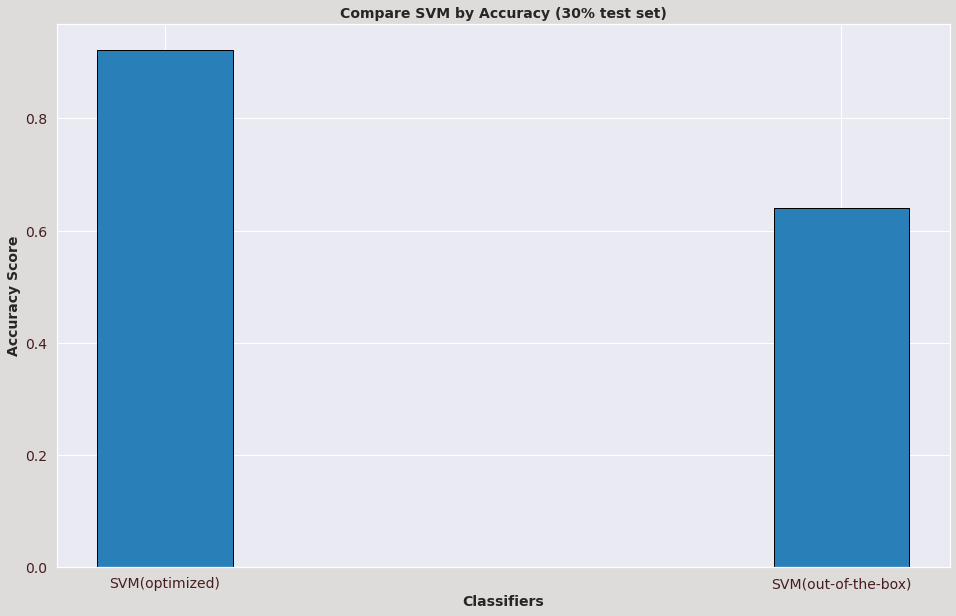

In [ ]:
accuracy_classifiers_compare_SVM_plot = []
accuracy_results_compare_SVM_plot = []

for i in range(len(dataFrame_accuracy_results_compare_SVM)):
  accuracy_classifiers_compare_SVM_plot.append(dataFrame_accuracy_results_compare_SVM[i][1])
  accuracy_results_compare_SVM_plot.append(dataFrame_accuracy_results_compare_SVM[i][6])

fig = plt.figure(figsize = (16, 10), facecolor='#dedbdb')
 
# creating the bar plot
plt.bar(accuracy_classifiers_compare_SVM_plot, accuracy_results_compare_SVM_plot, color=	"#2980b9", edgecolor ='black',
        width = 0.20)
 
plt.xlabel("Classifiers", fontweight='bold', fontsize="14", )
plt.ylabel("Accuracy Score", fontweight='bold', fontsize="14")
plt.title("Compare SVM by Accuracy (30% test set)", fontweight='bold',fontsize="14")
plt.tick_params(colors='#471e1e', axis='both', labelsize=14)
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'axes.facecolor':'#dedbdb'})
plt.show()

## Τέλος παραθέτουμε το confusion matrix του SVM(Optimized)

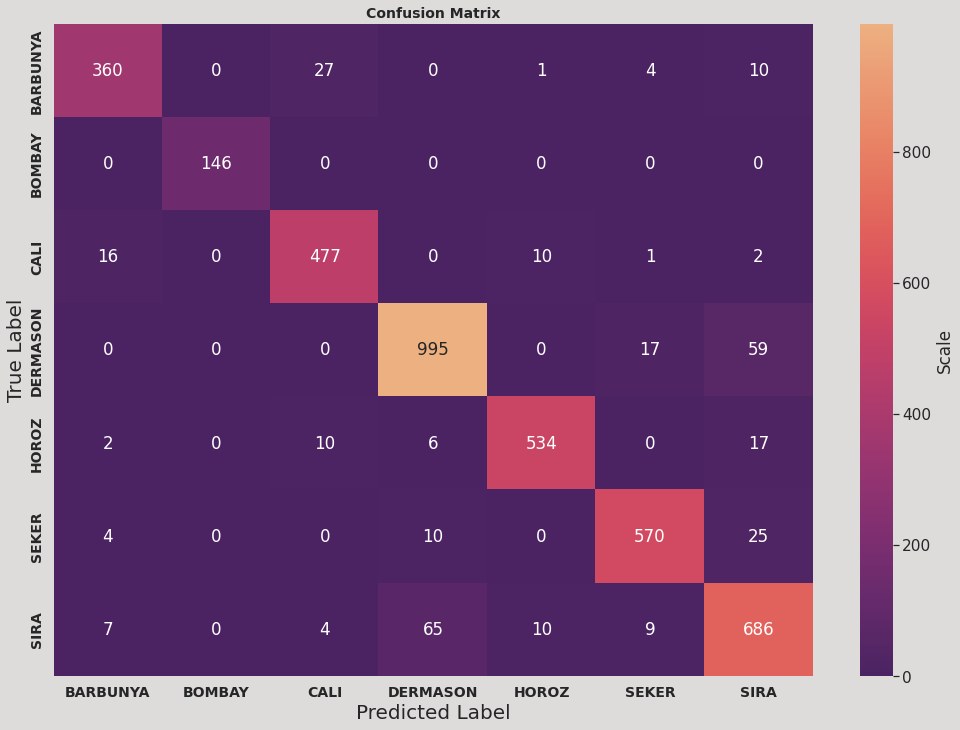

In [ ]:
cnf_matrix_SVM_optimized = confusion_matrix(test_labels, preds_SVM_3)
plot_confusion_matrix(cnf_matrix_SVM_optimized, labels)

## Eίναι πλέον εμφανής η διαφορά ανάμεσα στον SVM(Οut-of-the-box) με τον SVM(otpimized). Από το παραπάνω confusion matrix του SVM(Optimized) βλέπουμε πόσο έχει αυξηθεί ο αριθμός στη διαγώνιο, θέλαμε ένα βελτιωμένο accuracy και το πετύχαμε. Χαρακτηριστικά τo F1-Score στην κλάση BARBUNYA αυξήθηκε από 0.09 σε 0.91 ενώ στην κλάση SEKER από 0.33 σε 0.94. Στον παρακάτω πίνακα δείχνουμε τη βέλτιστη επιλογή που χρειαστήκε προκειμένου να φτάσουμε στο παραπάνω αποτέλεσμα.

|Επιλογές Προεπεργασίας Δεδομένων|Επιλογή  Προς Δοκιμασία|Υπερπαράμετρος SVM
| :----:|:----:|:----:|
|   VarianceThreshold(0.001), StandarScaler(default), SMOTE(default)|√    |c = 105, gamma = 0.1, υπόλοιπες υπερπαράμετροι(default)

##<br></br> Παρακάτω θα προσπαθήσουμε να βελτιστοποιήσουμε τις υπερπαραμέτρους του MLP με χρήση της βιβλιοθήκης βελτιστοποίησης υπερπαραμέτρων RAY. Παράλληλα προσπαθούμε να βρούμε μια βέλτιστη τιμή για τον τελικό αριθμό features του PCA. Eπίσης σε κάθε try κάνουμε oversample το dataset μας με SMOTE με default παραμέτρους, δηλαδή κάνουμε oversample όλες τις κλάσεις εκτός της πλειοψηφίας. Tέλος ξεκινάμε με crossvalidation = 2 διότι αν "κόψουμε" σε πάνω από δύο μέρη το train dataset τότε υπάρχουν περιπτώσεις όπου σε εκείνο το κομμάτι του crossvalidation απουσιάζει κάποια από τις 7 κλάσεις.

In [ ]:
pipeline = Pipeline(steps=[('sampler', smote), ('pca', pca), ("classify", MLPClassifier())], memory = 'tmp')

Hidden_Layers_Size =  [(50,), (70,), (100,)]
Activation = ['tanh', 'relu']
Solver = ['sgd', 'adam']
Alpha = [0.0001, 0.05]
Learning_Rate = ['constant','adaptive']
Max_Iterations = [700]
n_components = [6, 9, 11] # PCA - pca__n_components, βάζουμε max 11 καθώς έχουμε 12 χαρακτηριστικά πλέον

param_grid = [
  {'sampler': [smote], 'pca': [pca], 'pca__n_components' : n_components, 
   "classify__activation": Activation, "classify__solver": Solver, "classify__max_iter": Max_Iterations},

  {'sampler': [smote], 'pca': [pca], 'pca__n_components' : n_components, 
   "classify__hidden_layer_sizes": Hidden_Layers_Size, "classify__solver": ['sgd'], 
   "classify__alpha": Alpha, "classify__learning_rate": Learning_Rate, "classify__max_iter": Max_Iterations},
 ]

tune_search_MLP_1 = TuneGridSearchCV(
    pipeline,
    param_grid,
    scoring="accuracy",
    cv = 2,
    n_jobs = -1
)

# calculate fit time
start_time_fit = time.time()
tune_search_MLP_1.fit(train_scaled, train_labels)
fit_time_MLP_1 = time.time() - start_time_fit
# calculate predict time
start_time_predict = time.time()
preds_MLP_1 = tune_search_MLP_1.predict(test_scaled)
predict_time_MLP_1 = time.time() - start_time_predict
print(tune_search_MLP_1.best_params)
print(classification_report(test_labels, preds_MLP_1))
print(f'Fit time = {fit_time_MLP_1/60} min')
print(f'Predict time = {predict_time_MLP_1} sec')

{'classify__activation': 'tanh', 'classify__max_iter': 700, 'classify__solver': 'adam', 'pca': PCA(n_components=11), 'pca__n_components': 11, 'sampler': SMOTE()}
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.93       402
      BOMBAY       1.00      1.00      1.00       146
        CALI       0.92      0.95      0.94       506
    DERMASON       0.93      0.91      0.92      1071
       HOROZ       0.97      0.93      0.95       569
       SEKER       0.94      0.95      0.94       609
        SIRA       0.86      0.89      0.88       781

    accuracy                           0.92      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.92      0.92      0.92      4084

Fit time = 20.750032862027485 min
Predict time = 0.0436711311340332 sec


## Παρακάτω προσπαθούμε να κάνουμε Progressive TuneGridSearchCV όπου θα επεκτείνουμε ελαφρώς τα όρια για PCA, max_iter, hidden_layer_sizes και θα κάνουμε oversample με SMOTE. Kρατάμε στην υπερπαράμετρο solver->adam και στην υπερπαράμετρο activation->tanh.

In [ ]:
pipeline = Pipeline(steps=[('sampler', smote), ('pca', pca), ("classify", MLPClassifier())], memory = 'tmp')

Hidden_Layers_Size =  [(50), (100,), (150,), (200,)]
Activation = ['tanh']
Solver = ['adam']
Max_Iterations = [700, 750, 800] # Τοποθετούμε πάνω από 700 μετρήσεις ώστε να αποφύγουμε convergence warnings 
n_components = [9, 10, 11] # PCA - pca__n_components, βάζουμε τιμές κοντά στο 11

param_grid = [
  {'sampler': [smote], 'pca': [pca], 'pca__n_components' : n_components, 
   "classify__activation": Activation, "classify__solver": Solver, "classify__max_iter": Max_Iterations, "classify__hidden_layer_sizes": Hidden_Layers_Size}
 ]

tune_search_MLP_2 = TuneGridSearchCV(
    pipeline,
    param_grid,
    scoring="accuracy",
    cv = 2,
    n_jobs = -1
)

# calculate fit time
start_time_fit = time.time()
tune_search_MLP_2.fit(train_scaled, train_labels)
fit_time_MLP_2 = time.time() - start_time_fit
# calculate predict time
start_time_predict = time.time()
preds_MLP_2 = tune_search_MLP_2.predict(test_scaled)
predict_time_MLP_2 = time.time() - start_time_predict
print(tune_search_MLP_2.best_params)
print(classification_report(test_labels, preds_MLP_2))
print(f'Fit time = {fit_time_MLP_2/60} min')
print(f'Predict time = {predict_time_MLP_2} sec')

{'classify__activation': 'tanh', 'classify__hidden_layer_sizes': 50, 'classify__max_iter': 700, 'classify__solver': 'adam', 'pca': PCA(n_components=11), 'pca__n_components': 11, 'sampler': SMOTE()}
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.92      0.92       402
      BOMBAY       1.00      1.00      1.00       146
        CALI       0.93      0.94      0.93       506
    DERMASON       0.92      0.93      0.92      1071
       HOROZ       0.97      0.94      0.95       569
       SEKER       0.94      0.95      0.94       609
        SIRA       0.89      0.87      0.88       781

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084

Fit time = 26.48005128701528 min
Predict time = 0.022164583206176758 sec


## Παρατηρούμε πως όλες οι υπερπαράμετροι έμειναν σταθερές εκτός την υπερπαράμετρο hidden_layer_sizes. Ως αποτέλεσμα πετύχαμε ελαφρώς καλύτερες αποδόσεις. Κάνουμε ένα ακόμα progressive search με σκοπό να βρούμε αν υπάρχει  τιμή στην υπερπαράμετρο hidden_layer_sizes.

In [ ]:
pipeline = Pipeline(steps=[('sampler', smote), ('pca', pca), ("classify", MLPClassifier())], memory = 'tmp')

Hidden_Layers_Size =  [(30), (50,), (70,)]
Activation = ['tanh']
Solver = ['adam']
Max_Iterations = [700, 750] # Τοποθετούμε πάνω από 700 μετρήσεις ώστε να αποφύγουμε convergence warnings 
n_components = [9, 10, 11] # PCA - pca__n_components, βάζουμε τιμές κοντά στο 11

param_grid = [
  {'sampler': [smote], 'pca': [pca], 'pca__n_components' : n_components, 
   "classify__activation": Activation, "classify__solver": Solver, "classify__max_iter": Max_Iterations, "classify__hidden_layer_sizes": Hidden_Layers_Size}
 ]

tune_search_MLP_3 = TuneGridSearchCV(
    pipeline,
    param_grid,
    scoring="accuracy",
    cv = 2,
    n_jobs = -1
)

# calculate fit time
start_time_fit = time.time()
tune_search_MLP_3.fit(train_scaled, train_labels)
fit_time_MLP_3 = time.time() - start_time_fit
# calculate predict time
start_time_predict = time.time()
preds_MLP_3 = tune_search_MLP_3.predict(test_scaled)
predict_time_MLP_3 = time.time() - start_time_predict
print(tune_search_MLP_3.best_params)
print(classification_report(test_labels, preds_MLP_3))
print(f'Fit time = {fit_time_MLP_3/60} min')
print(f'Predict time = {predict_time_MLP_3} sec')

{'classify__activation': 'tanh', 'classify__hidden_layer_sizes': (70,), 'classify__max_iter': 700, 'classify__solver': 'adam', 'pca': PCA(n_components=9), 'pca__n_components': 9, 'sampler': SMOTE()}
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.92      0.92       402
      BOMBAY       0.99      1.00      1.00       146
        CALI       0.94      0.94      0.94       506
    DERMASON       0.92      0.91      0.92      1071
       HOROZ       0.96      0.94      0.95       569
       SEKER       0.93      0.95      0.94       609
        SIRA       0.86      0.88      0.87       781

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Fit time = 10.953922243913015 min
Predict time = 0.0272982120513916 sec


## Kαταλήγουμε σε μία απόδοση ελαφρώς χειρότερη από την προηγούμενη. Οπότε πλέον καταλήγουμε σε μια βελτιστοποίηση του ταξινομητή η οποία περιλαμβάνει τις ακριβώς προηγούμενες παράμετρους, τις οποίες τις αναγράφουμε παρακάτω.

|Επιλογές Προεπεργασίας Δεδομένων|Επιλογή  Προς Δοκιμασία|Υπερπαράμετρος MLP
| :----:|:----:|:----:|
|   VarianceThreshold(0.001), StandarScaler(default), SMOTE(default), PCA(n=11)|√    |activation = tanh, hidden_layer_sizes = (50,), max_iter = 700, solver = 'adam', υπόλοιπες υπερπαράμετροι(default)

## Πλέον θα κάνουμε μια σύγκριση μεταξύ του MLP(optimized) και του MLP(out-of-the-box).

In [ ]:
index_i=0
list_of_para = []
for k,v in tune_search_MLP_2.best_params.items():
  if index_i == 4:
    break
  # remove classify__solver and keep only solver, so we slice [10:]
  string = str(k[10:] + " = " + str(v))
  list_of_para.append(string)
  index_i+=1

# σύγκριση MLP (out-of-the-box vs optimized)
accuracy_results_compare_MLP['MLP(optimized)'] = [[tune_search_MLP_2.best_estimator[0], tune_search_MLP_2.best_estimator[1], "VarianceThreshold(0.001)", "ScandarScaler"], list_of_para,
                                                  f'{fit_time_MLP_1/60 + fit_time_MLP_2/60} min', 
                                                  f'{predict_time_MLP_1 + predict_time_MLP_2} sec', accuracy_score(test_labels, preds_MLP_2)]

# σύγκριση [MLP(out-of-the-box vs optimized) vs MLP(out-of-the-box vs optimized)]
accuracy_results_compare['MLP(optimized)'] = [[tune_search_MLP_2.best_estimator[0], tune_search_MLP_2.best_estimator[1], "VarianceThreshold(0.001)", "ScandarScaler"], list_of_para,
                                                  f'{fit_time_MLP_1/60 + fit_time_MLP_2/60} min', 
                                                  f'{predict_time_MLP_1 + predict_time_MLP_2} sec', accuracy_score(test_labels, preds_MLP_2)]

In [ ]:
sorted_accuracy_results_compare_MLP = dict(sorted(accuracy_results_compare_MLP. items(), key=lambda x: x[1][4], reverse=True))
dataFrame_accuracy_results_compare_MLP = []
index_i = 0
for k,v in sorted_accuracy_results_compare_MLP.items():
  classifier = k
  values = v
  index_i +=1
  tupla = (index_i, k, v[0], v[1], v[2], v[3], v[4])
  dataFrame_accuracy_results_compare_MLP.append(tupla)

df_accuracy_results_compare_MLP = pd.DataFrame(dataFrame_accuracy_results_compare_MLP, columns =['Index','Classifier', 'Dataset Optimized', 'Classifier Optimized', 'Train Time', 'Test Time', 'Accuracy'])

In [ ]:
df_accuracy_results_compare_MLP.style.set_properties(**{'text-align': 'left'}).hide_index().set_table_styles([ dict(selector='th', props=[('text-align', 'left')])])

Index,Classifier,Dataset Optimized,Classifier Optimized,Train Time,Test Time,Accuracy
1,MLP(optimized),"[SMOTE(), PCA(n_components=11), 'VarianceThreshold(0.001)', 'ScandarScaler']","['activation = tanh', 'hidden_layer_sizes = 50', 'max_iter = 700', 'solver = adam']",47.23008414904277 min,0.06583571434020996 sec,0.925563
2,MLP(out-of-the-box),default dataset,default parameters,6.302629232406616 sec,0.010539531707763672 sec,0.363614


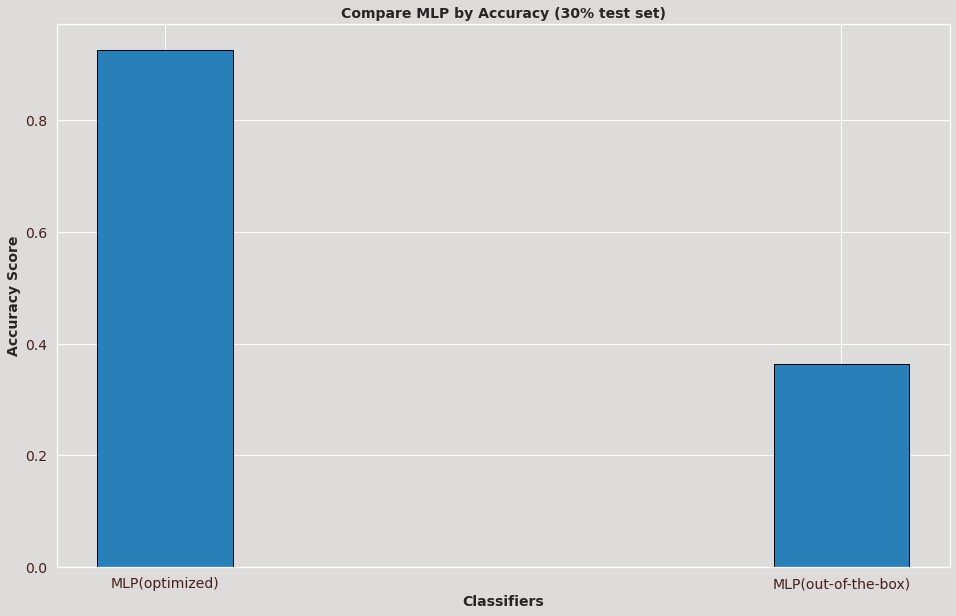

In [ ]:
accuracy_classifiers_compare_MLP_plot = []
accuracy_results_compare_MLP_plot = []

for i in range(len(df_accuracy_results_compare_MLP)):
  accuracy_classifiers_compare_MLP_plot.append(dataFrame_accuracy_results_compare_MLP[i][1])
  accuracy_results_compare_MLP_plot.append(dataFrame_accuracy_results_compare_MLP[i][6])

fig = plt.figure(figsize = (16, 10), facecolor='#dedbdb')
 
# creating the bar plot
plt.bar(accuracy_classifiers_compare_MLP_plot, accuracy_results_compare_MLP_plot, color=	"#2980b9", edgecolor ='black',
        width = 0.20)
 
plt.xlabel("Classifiers", fontweight='bold', fontsize="14", )
plt.ylabel("Accuracy Score", fontweight='bold', fontsize="14")
plt.title("Compare MLP by Accuracy (30% test set)", fontweight='bold',fontsize="14")
plt.tick_params(colors='#471e1e', axis='both', labelsize=14)
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'axes.facecolor':'#dedbdb'})
plt.show()

## Τέλος παραθέτουμε το confusion matrix του MLP(Optimized)

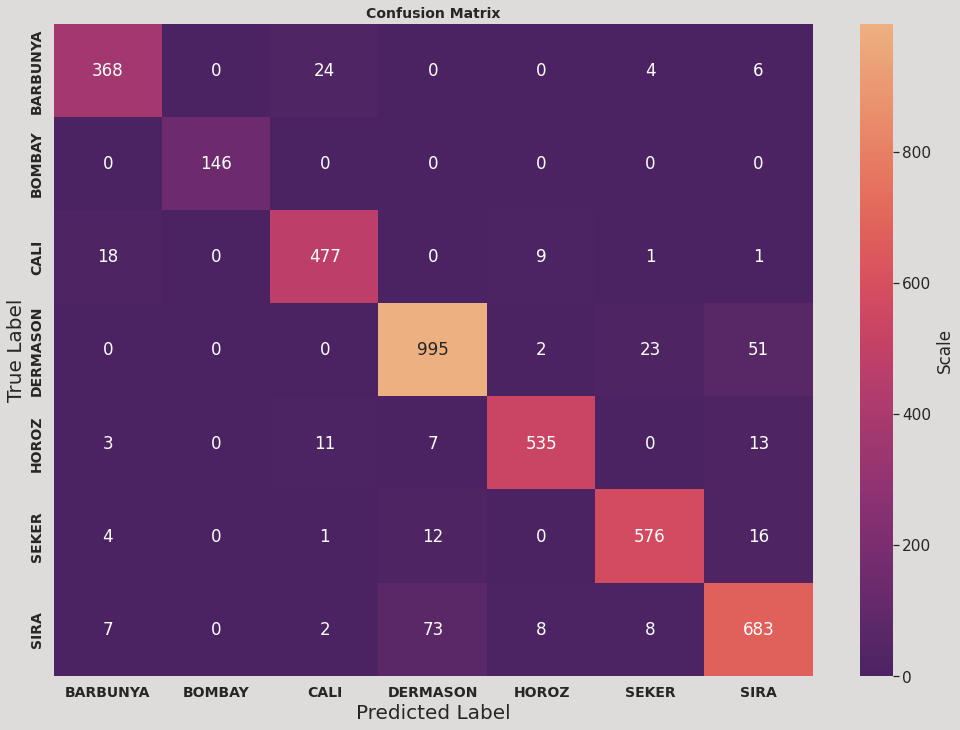

In [ ]:
cnf_matrix_MLP_optimized = confusion_matrix(test_labels, preds_MLP_2)
plot_confusion_matrix(cnf_matrix_MLP_optimized, labels)

## Συγκρίνοντας τον MLP(Optimizes) με τον MLP(out-of-the-box) βλέπουμε τη σημαντική διαφορά από τα παραπάνω (διαγράμματα, πίνακες, confusion matrix).


## Ήρθε η ώρα όμως να συγκρίνουμε τους δύο ταξινομητές SVM, MLP.
## Παρακάτω απεικονίζουμε σε πίνακα, bar-plot διάγραμμα και τέλος τα 4 confusion matrix σε μία εικόνα όπου μπορούμε να βγάλουμε σημαντικά συμπεράσματα.

In [ ]:
print(accuracy_results_compare)

{'SVM(out-of-the-box)': ['default dataset', 'default parameters', '2.7639002799987793 sec', '2.4017136096954346 sec', 0.6405484818805093], 'MLP(out-of-the-box)': ['default dataset', 'default parameters', '6.302629232406616 sec', '0.010539531707763672 sec', 0.36361410381978454], 'SVM(optimized)': [[SMOTE(), 'VarianceThreshold(0.001)', 'ScandarScaler'], SVC(C=105, gamma=0.1), '20.07183462381363 min', '2.4748620986938477 sec', 0.9226248775710089], 'MLP(optimized)': [[SMOTE(), PCA(n_components=11), 'VarianceThreshold(0.001)', 'ScandarScaler'], ['activation = tanh', 'hidden_layer_sizes = 50', 'max_iter = 700', 'solver = adam'], '47.23008414904277 min', '0.06583571434020996 sec', 0.9255631733594515]}


In [ ]:
# sort ως προς το accuracy που είναι το 4 στοιχείου του value κάθε key του dictionary accuracy_results_compare
sorted_accuracy_results_compare = dict(sorted(accuracy_results_compare. items(), key=lambda x: x[1][4], reverse=True))
dataFrame_accuracy_results_compare = []
index_i = 0
for k,v in sorted_accuracy_results_compare.items():
  classifier = k
  values = v
  index_i +=1
  tupla = (index_i, k, v[0], v[1], v[2], v[3], v[4])
  dataFrame_accuracy_results_compare.append(tupla)

df_accuracy_results_compare = pd.DataFrame(dataFrame_accuracy_results_compare, columns =['Index','Classifier', 'Dataset Optimized', 'Classifier Optimized', 'Train Time', 'Test Time', 'Accuracy'])

In [ ]:
df_accuracy_results_compare.style.set_properties(**{'text-align': 'left'}).hide_index().set_table_styles([ dict(selector='th', props=[('text-align', 'left')])])

Index,Classifier,Dataset Optimized,Classifier Optimized,Train Time,Test Time,Accuracy
1,MLP(optimized),"[SMOTE(), PCA(n_components=11), 'VarianceThreshold(0.001)', 'ScandarScaler']","['activation = tanh', 'hidden_layer_sizes = 50', 'max_iter = 700', 'solver = adam']",47.23008414904277 min,0.06583571434020996 sec,0.925563
2,SVM(optimized),"[SMOTE(), 'VarianceThreshold(0.001)', 'ScandarScaler']","SVC(C=105, gamma=0.1)",20.07183462381363 min,2.4748620986938477 sec,0.922625
3,SVM(out-of-the-box),default dataset,default parameters,2.7639002799987793 sec,2.4017136096954346 sec,0.640548
4,MLP(out-of-the-box),default dataset,default parameters,6.302629232406616 sec,0.010539531707763672 sec,0.363614


## Ήδη μπορούμε να παρατηρήσουμε πως ελάχιστα καλύτερος προκύπτει ο MLP ως προς accuracy. Ωστόσο μπορούμε από τώρα να πούμε πως οι πόροι και ο χρόνος που χρειάζεται ο MLP προκείμενου να πετύχει καλύτερο accuracy κατά 0.002938 μας οδηγούν στο να προτείνουμε τον SVM στο Dry-Bean Dataset. Ο SVM χρειάστηκε συνολικά 20 λεπτά "εκπαίδευσης" ενώ ο MLP 47 λεπτά. Αυτός ο χρόνος όπως διατυπώθηκε νωρίτερα είναι ο συνολικός χρόνος που χρειάστηκε εκπαίδευση ο ταξινομητής μέχρι το σημείο όπου σταματήσαμε να βελτιστοποιούμε περαιτέρω τον ταξινομητής μας. Προφανώς αν κάποιος εισάγει αυτές τις παράμετρους απευθείας ο ταξινομητής θα εκτελεστεί πολύ νωρίτερα.

## Παρακάτω έχουμε το bar-plot διάγραμμα.


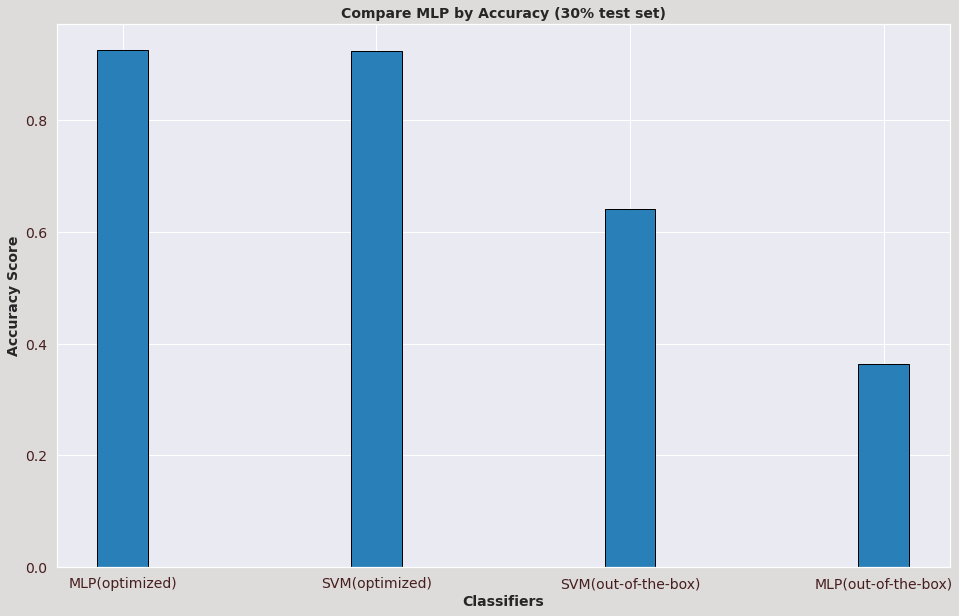

In [ ]:
accuracy_classifiers_compare_plot = []
accuracy_results_compare_plot = []

for i in range(len(df_accuracy_results_compare)):
  accuracy_classifiers_compare_plot.append(dataFrame_accuracy_results_compare[i][1])
  accuracy_results_compare_plot.append(dataFrame_accuracy_results_compare[i][6])

fig = plt.figure(figsize = (16, 10), facecolor='#dedbdb')
 
# creating the bar plot
plt.bar(accuracy_classifiers_compare_plot, accuracy_results_compare_plot, color=	"#2980b9", edgecolor ='black',
        width = 0.20)
 
plt.xlabel("Classifiers", fontweight='bold', fontsize="14", )
plt.ylabel("Accuracy Score", fontweight='bold', fontsize="14")
plt.title("Compare MLP by Accuracy (30% test set)", fontweight='bold',fontsize="14")
plt.tick_params(colors='#471e1e', axis='both', labelsize=14)
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'axes.facecolor':'#dedbdb'})
plt.show()

## Tέλος απεικονίζουμε και τα 4 confusion matrix, 2 για τους optimized SVM και MLP και 2 για out-of-the-box SVM και MLP.

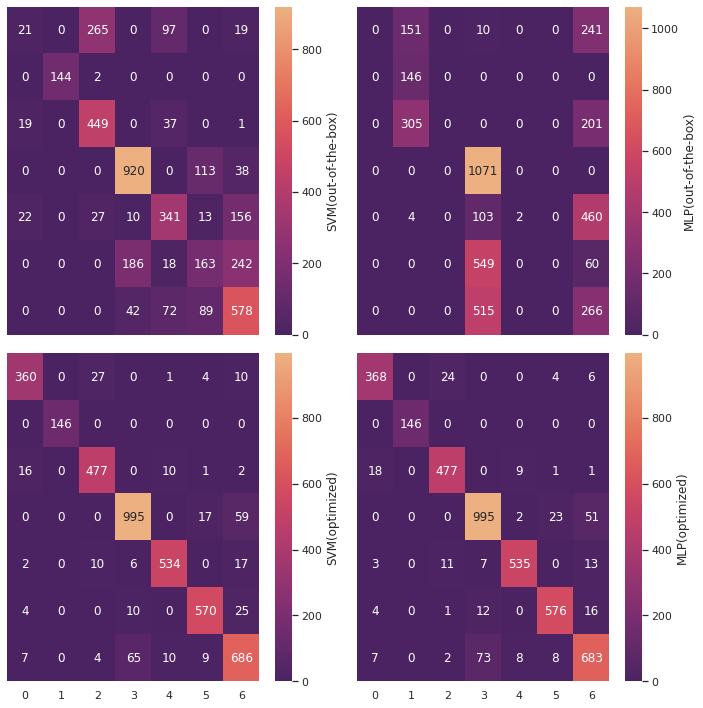

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.heatmap(cnf_matrix_SVM_out_of_the_box, annot=True, cmap="flare_r", cbar_kws={'label': 'SVM(out-of-the-box)'}, fmt='g', ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.heatmap(cnf_matrix_MLP_out_of_the_box, annot=True, cmap="flare_r", cbar_kws={'label': 'MLP(out-of-the-box)'}, fmt='g', ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.heatmap(cnf_matrix_SVM_optimized, annot=True, cmap="flare_r", cbar_kws={'label': 'SVM(optimized)'}, fmt='g', ax=axes[1, 0])

# Plot a histogram and kernel density estimate
sns.heatmap(cnf_matrix_MLP_optimized, annot=True, cmap="flare_r", cbar_kws={'label': 'MLP(optimized)'}, fmt='g', ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

## Πλέον μπορούμε να έχουμε μία καλύτερη εποπτεία των ταξινομητών. Yπενθυμίζουμε τα labels είναι από αριστερά προς τα δεξιά τα εξής:
##['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

## Όπως και πριν η τελική πρόταση μας παραμένει ο SVM καθώς και από τα confusion matrix παραπάνω βλέπουμε πόσο μικρές διαφορές έχει με τον MLP τη στιγμή που χρειάζεται λιγότερους υπολογιστικούς πόρους και χρόνο για να εκπαιδευτεί.
